In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from tqdm import tqdm

PATH = 'D:\\DA\\TestTasks\\Botprise\\'

SEED = 42

# 1. Basic data analysis

In [2]:
tickets = pd.read_csv(PATH + 'tickets.csv')
tickets.shape

(5446, 1)

In [3]:
tickets.head(10)

,ticket
0,eit-prismadm01.tgna.tegna.com: System or agent...
1,ATL-NELLC-N9K-2: Interface state changed to op...
2,vaqupdtoms01: Device Failed Availability Check...
3,test-vm-01: VMware: VM CPU Usage Has Exceeded ...
4,NTNX-local-ds-19SM6J290326-B: Device Failed Av...
5,IntegrateStaging: Device Failed Availability C...
6,iad01vm22-04: Required service not running: To...
7,dataconstructionserver: Device Failed Availabi...
8,etm-priwomsrd05.tgna.tegna.com: System or agen...
9,iad1-p03-p-mw09: Host Resource: CPU has exceed...


In [4]:
tickets['f1'] = tickets['ticket'].map(lambda x: x.split(': ')[0])

In [5]:
def get_f2(ticket_str):
    pos = ticket_str.find(': ')
    if pos == -1:
        return ''
    return ticket_str[pos+2:]

In [6]:
tickets['f2'] = tickets['ticket'].map(get_f2)
tickets.head(10)

,ticket,f1,f2
0,eit-prismadm01.tgna.tegna.com: System or agent...,eit-prismadm01.tgna.tegna.com,System or agent has recently restarted
1,ATL-NELLC-N9K-2: Interface state changed to op...,ATL-NELLC-N9K-2,Interface state changed to operationally down:...
2,vaqupdtoms01: Device Failed Availability Check...,vaqupdtoms01,Device Failed Availability Check: UDP - SNMP
3,test-vm-01: VMware: VM CPU Usage Has Exceeded ...,test-vm-01,VMware: VM CPU Usage Has Exceeded Threshold (9...
4,NTNX-local-ds-19SM6J290326-B: Device Failed Av...,NTNX-local-ds-19SM6J290326-B,Device Failed Availability Check: Component de...
5,IntegrateStaging: Device Failed Availability C...,IntegrateStaging,Device Failed Availability Check: Component de...
6,iad01vm22-04: Required service not running: To...,iad01vm22-04,Required service not running: Tomcat7
7,dataconstructionserver: Device Failed Availabi...,dataconstructionserver,Device Failed Availability Check: Component de...
8,etm-priwomsrd05.tgna.tegna.com: System or agen...,etm-priwomsrd05.tgna.tegna.com,System or agent has recently restarted
9,iad1-p03-p-mw09: Host Resource: CPU has exceed...,iad1-p03-p-mw09,Host Resource: CPU has exceeded threshold 90%....


In [7]:
tickets[tickets['f2'] == '']

,ticket,f1,f2
2169,BGP Tunnels down,BGP Tunnels down,
2517,BGP is down.,BGP is down.,
3867,VIVO & SAO PAULO Brazil BGP neighbors not form...,VIVO & SAO PAULO Brazil BGP neighbors not form...,
3886,BGP TUNNEL DOWN - TMDATA,BGP TUNNEL DOWN - TMDATA,
3927,Critical - BGP tunnels for various carriers down,Critical - BGP tunnels for various carriers down,
4017,ASHBURN BGP Tunnel Down (COTAS,ASHBURN BGP Tunnel Down (COTAS,
4666,"Need confirmation on ""DOWN"" BGP tunnels in Ash...","Need confirmation on ""DOWN"" BGP tunnels in Ash...",


In [8]:
tickets.loc[tickets['f2'] == '', 'f2'] = tickets['f1']
tickets.loc[tickets['f2'] == tickets['f1'], 'f1'] = ''
tickets.rename(columns={'f1': 'object', 'f2': 'subject'}, inplace=True)

In [44]:
def draw_barplot(pd_series, n_features=15, mini=False):
    val_cnt = pd_series.value_counts()
    if not n_features:
        n_features = val_cnt.shape[0]
    feat_names = val_cnt.index.map(lambda x: x[:70])
    feat_values = val_cnt.values
    if not mini:
        plt.figure(figsize=(8, 6))
    else:
        plt.figure(figsize=(6, 4))
    plt.tick_params(axis = 'y', left = False, right = True, labelleft = False, labelright = True)
    bar = sns.barplot(y=feat_names[:n_features][:20], x=feat_values[:n_features], orient='h');
    bar.set(title='{}: Total {} values'.format(pd_series.name, val_cnt.shape[0]));

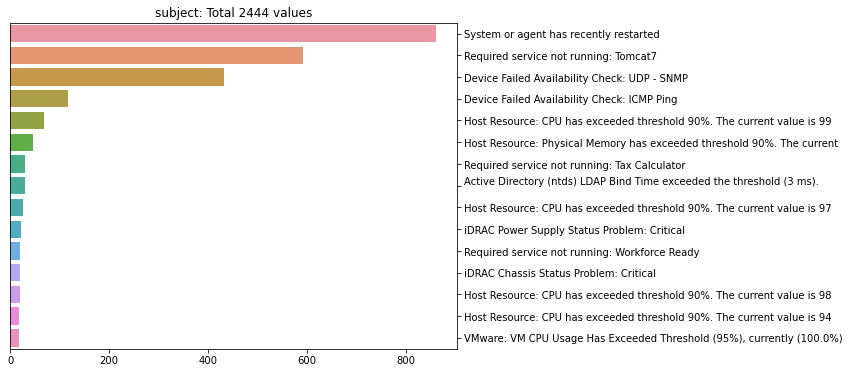

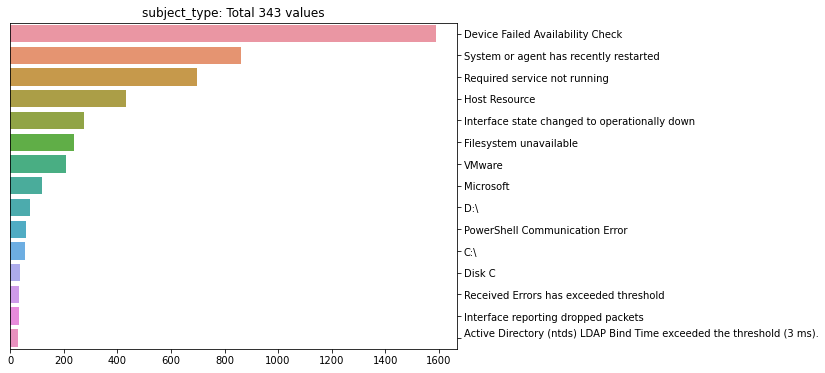

In [45]:
draw_barplot(tickets['subject'])
draw_barplot(tickets['subject_type'])

In [46]:
def get_obj_type(obj_str):
    pos = obj_str.find('.')
    # Domain name
    if pos >= 0:
        return obj_str[pos+1:]
    right_part = obj_str.split('-')[-1]
    if right_part.lower() in ['db', 'app']:
        return right_part.lower()

In [47]:
tickets['object_type'] = tickets['object'].map(get_obj_type)
tickets['subject_type'] = tickets['subject'].map(lambda x: x.split(': ')[0])
tickets.head()

,ticket,object,subject,object_type,subject_type,is_critical,cluster_kmeans,cluster_spectral,cluster_agg
0,eit-prismadm01.tgna.tegna.com: System or agent...,eit-prismadm01.tgna.tegna.com,System or agent has recently restarted,tgna.tegna.com,System or agent has recently restarted,NaN,3,3,4
1,ATL-NELLC-N9K-2: Interface state changed to op...,ATL-NELLC-N9K-2,Interface state changed to operationally down:...,None,Interface state changed to operationally down,NaN,2,6,6
2,vaqupdtoms01: Device Failed Availability Check...,vaqupdtoms01,Device Failed Availability Check: UDP - SNMP,None,Device Failed Availability Check,NaN,4,0,3
3,test-vm-01: VMware: VM CPU Usage Has Exceeded ...,test-vm-01,VMware: VM CPU Usage Has Exceeded Threshold (9...,None,VMware,NaN,2,6,1
4,NTNX-local-ds-19SM6J290326-B: Device Failed Av...,NTNX-local-ds-19SM6J290326-B,Device Failed Availability Check: Component de...,None,Device Failed Availability Check,NaN,1,0,0


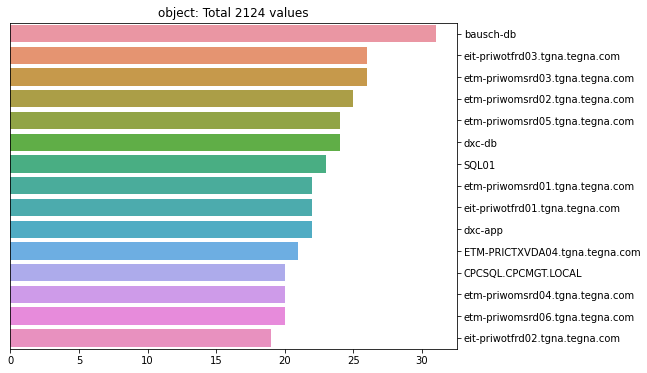

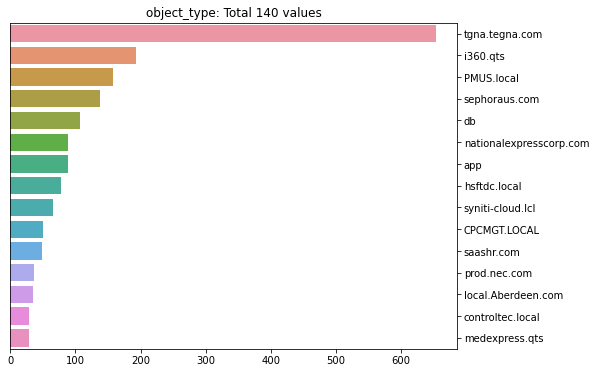

In [48]:
draw_barplot(tickets['object'])
draw_barplot(tickets['object_type'])

In [49]:
def get_critical_type(subject_str):
    critical_word = [' Critical', ' critical']
    for i in range(0, 2):
        if critical_word[i] in subject_str:
            return i+1

Most critical issues:


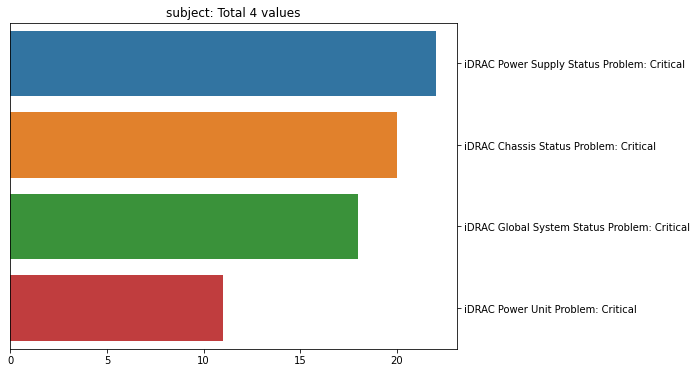

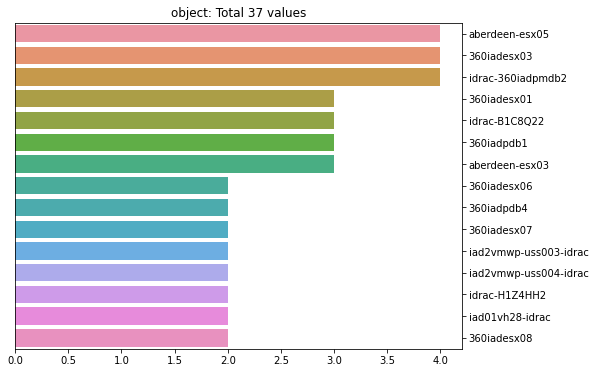

In [62]:
tickets['is_critical'] = tickets['subject'].map(get_critical_type)
print("Most critical issues:")
draw_barplot(tickets[tickets['is_critical'] == 1]['subject'], n_features=False)
draw_barplot(tickets[tickets['is_critical'] == 1]['object'])

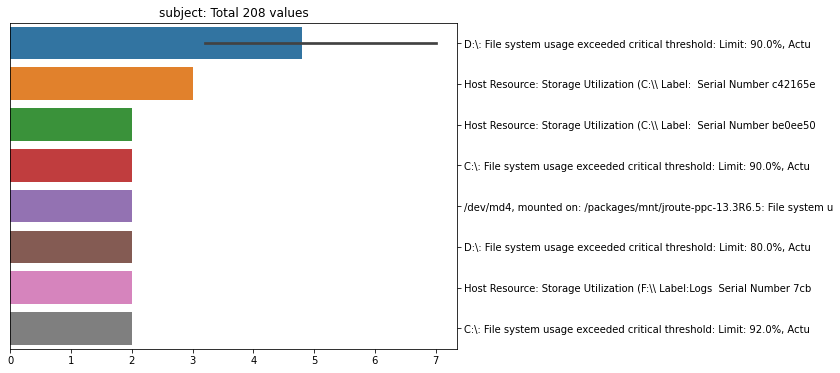

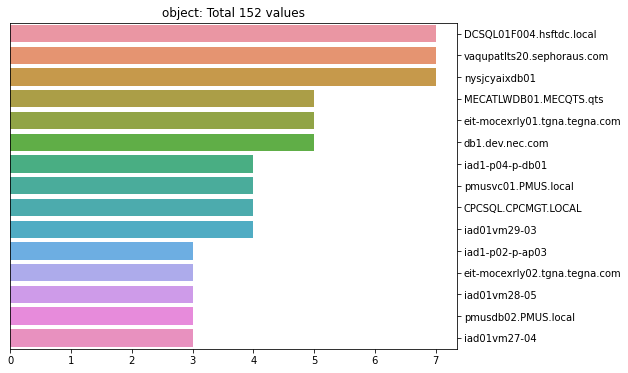

In [96]:
draw_barplot(tickets[tickets['is_critical'] == 2]['subject'])
draw_barplot(tickets[tickets['is_critical'] == 2]['object'])

# 2. Clustering

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [19]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(tickets['subject'])

100%|████████████████████████████████████████████| 9/9 [00:15<00:00,  1.76s/it]


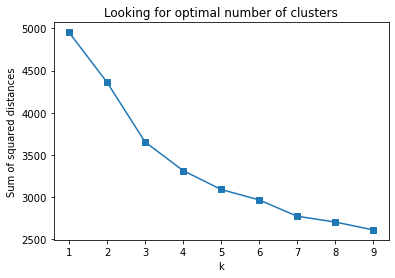

In [20]:
inertia = []
k_range = range(1,10)
for k in tqdm(k_range):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=SEED).fit(X)
    inertia.append(km.inertia_)
plt.plot(k_range, inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Looking for optimal number of clusters')
plt.show()

In [21]:
d = []
for k in range(1, len(inertia)-2):
    d.append((inertia[k] - inertia[k+1]) / (inertia[k-1] - inertia[k]))
k_opt = d.index(min(d)) + 2
print("Optimal number of clusters:", k_opt)

Optimal number of clusters: 7


## We will implement K-Means, Spectral and Agglomerative clustering

In [22]:
model_kmeans = KMeans(n_clusters=k_opt, random_state=SEED).fit(X)
tickets['cluster_kmeans'] = model_kmeans.labels_

In [23]:
model_spectral = SpectralClustering(n_clusters=k_opt, random_state=SEED, affinity="nearest_neighbors").fit(X)
tickets['cluster_spectral'] = model_spectral.labels_

C:\Div\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [24]:
model_agg = AgglomerativeClustering(n_clusters=k_opt).fit(X.toarray())
tickets['cluster_agg'] = model_agg.labels_

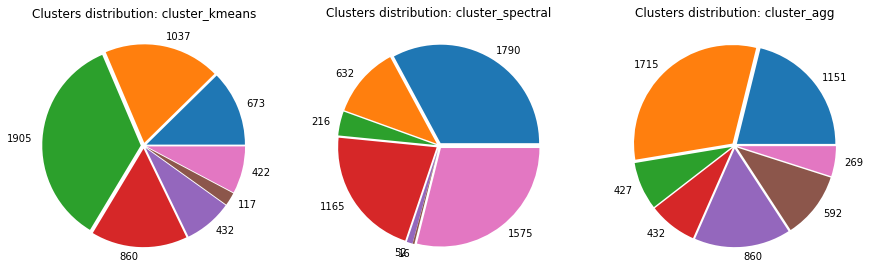

In [25]:
all_clusters = ['cluster_kmeans', 'cluster_spectral', 'cluster_agg']
pie, ax = plt.subplots(figsize=[15, 12])
for cls_method in range(len(all_clusters)):
    data = tickets.groupby(all_clusters[cls_method])['ticket'].count()
    pylab.subplot(1, 3, cls_method + 1)
    plt.pie(x=data, labels=data.values, explode=[0.03]*7);
    plt.title("Clusters distribution: " + all_clusters[cls_method], fontsize=12);

In [54]:
print("Silhouette:")
print("  K-Means: {:.3f}".format(silhouette_score(X, tickets['cluster_kmeans'])))
print("  Spectral: {:.3f}".format(silhouette_score(X, tickets['cluster_spectral'])))
print("  Agglomerative: {:.3f}".format(silhouette_score(X, tickets['cluster_agg'])))

Silhouette:
  K-Means: 0.394
  Spectral: 0.283
  Agglomerative: 0.383


K-Means and Agglomerative clustering are the best in terms of Silhouette metric.
Let's look at tickets distribution between the clusters for 2 best methods

K-Means


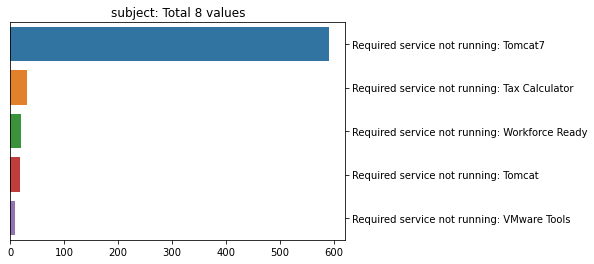

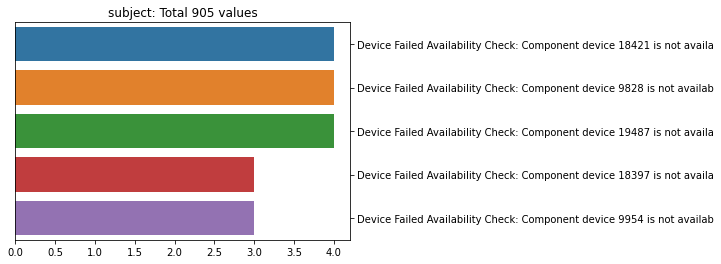

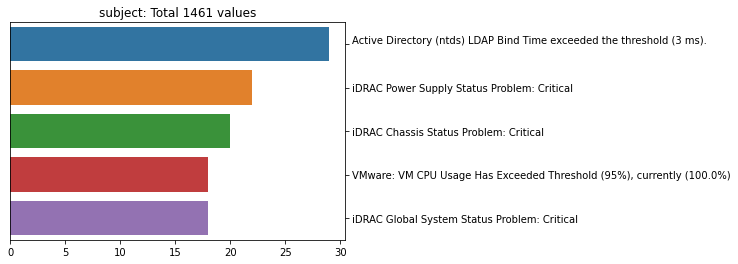

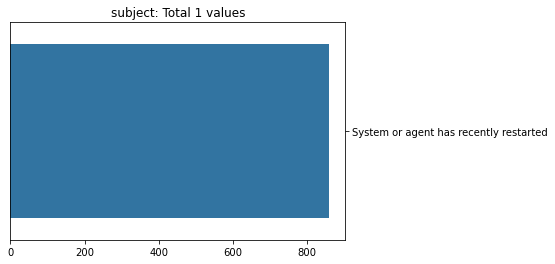

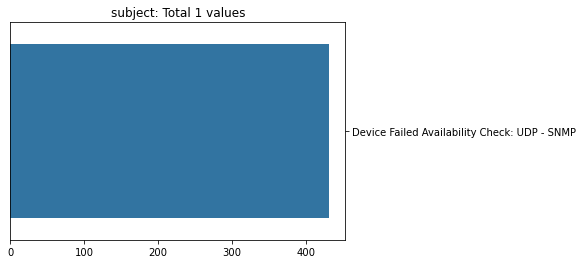

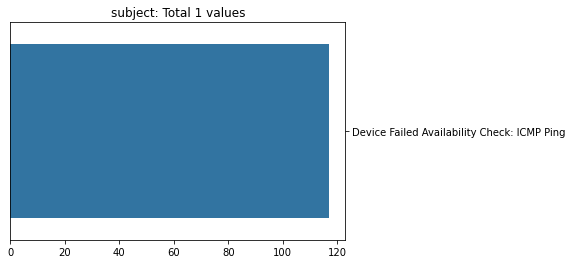

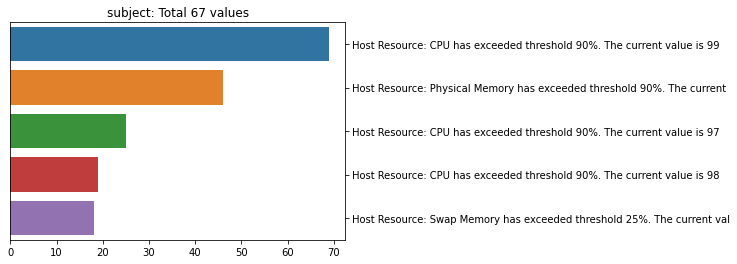

In [58]:
print("K-Means")
for cluster_ind in range(0, k_opt):
    draw_barplot(tickets[tickets['cluster_kmeans'] == cluster_ind]['subject'], n_features=5, mini=True)

Agglomerative


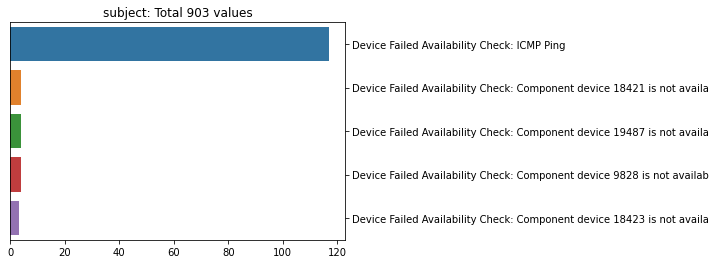

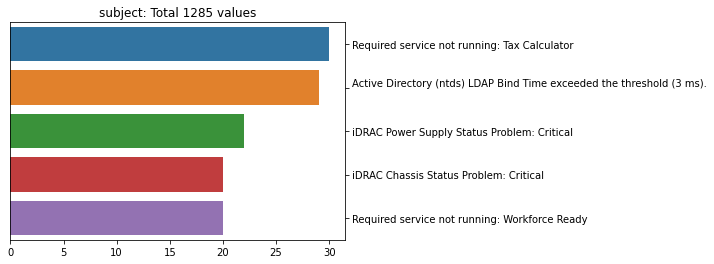

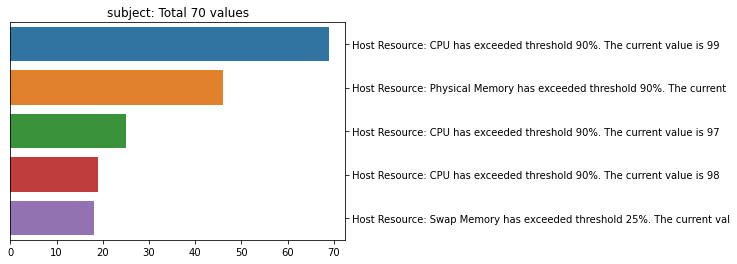

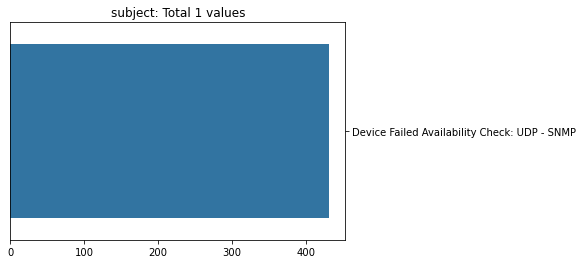

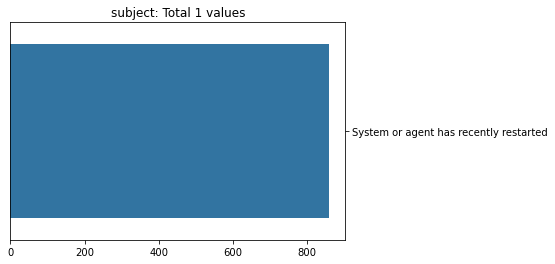

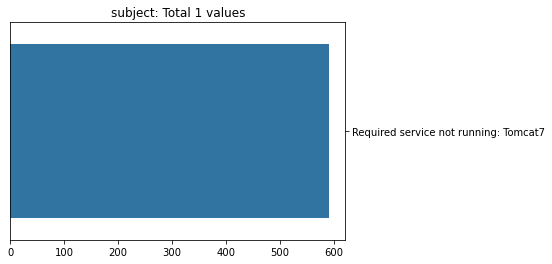

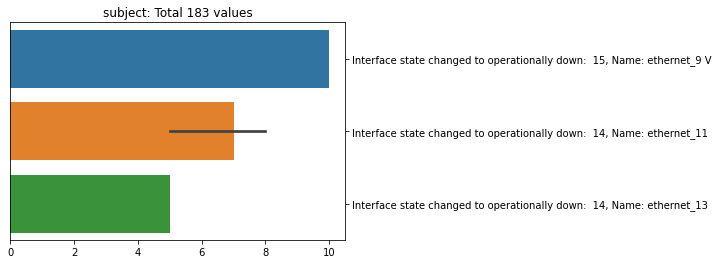

In [59]:
print("Agglomerative")
for cluster_ind in range(0, k_opt):
    draw_barplot(tickets[tickets['cluster_agg'] == cluster_ind]['subject'], n_features=5, mini=True)

We can conclude that both methods (K-Means and Agglomerative clustering) give relevant representation of our data.

# 3. Summary of tickets

In [97]:
print("Total number of tickets:", tickets.shape[0])
print("Most critical issues: {} ({:.1%})".format(tickets[tickets['is_critical'] == 1].shape[0], \
     tickets[tickets['is_critical'] == 1].shape[0] / tickets.shape[0]))

Total number of tickets: 5446
Most critical issues: 71 (1.3%)


In [119]:
most_critical_subj = tickets[tickets['is_critical'] == 1]['subject'].value_counts()
most_critical_obj = tickets[tickets['is_critical'] == 1]['object'].value_counts()
critical_subj = tickets[tickets['is_critical'] == 2]['subject'].value_counts()
pd.DataFrame(most_critical_subj).rename(columns={'subject': 'count'})

,count
iDRAC Power Supply Status Problem: Critical,22
iDRAC Chassis Status Problem: Critical,20
iDRAC Global System Status Problem: Critical,18
iDRAC Power Unit Problem: Critical,11


In [118]:
print("Objects involved in most critical issues:")
pd.DataFrame(most_critical_obj).rename(columns={'object': 'count'})

Objects involved in most critical issues:


,count
aberdeen-esx05,4
360iadesx03,4
idrac-360iadpmdb2,4
360iadesx01,3
idrac-B1C8Q22,3
360iadpdb1,3
aberdeen-esx03,3
360iadesx06,2
360iadpdb4,2
360iadesx07,2


In [101]:
print("Critical issues: {} ({:.1%})".format(tickets[tickets['is_critical'] == 2].shape[0], \
     tickets[tickets['is_critical'] == 2].shape[0] / tickets.shape[0]))
pd.DataFrame(critical_subj).rename(columns={'subject': 'count'}).head(10)

Critical issues: 240 (4.4%)


,count
"D:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.01%",9
"D:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.02%",5
"D:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.00%",4
Host Resource: Storage Utilization (C:\\ Label: Serial Number c42165e0) of type HrStorageFixedDisk has exceeded critical threshold 95,3
"D:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 100.00%",3
"D:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.03%",3
Host Resource: Storage Utilization (C:\\ Label: Serial Number be0ee50e) of type HrStorageFixedDisk has exceeded critical thresho,2
"C:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.18%",2
"/dev/md4, mounted on: /packages/mnt/jroute-ppc-13.3R6.5: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 100.00%",2
"C:\: File system usage exceeded critical threshold: Limit: 90.0%, Actual: 90.05%",2


Tickets distribution:


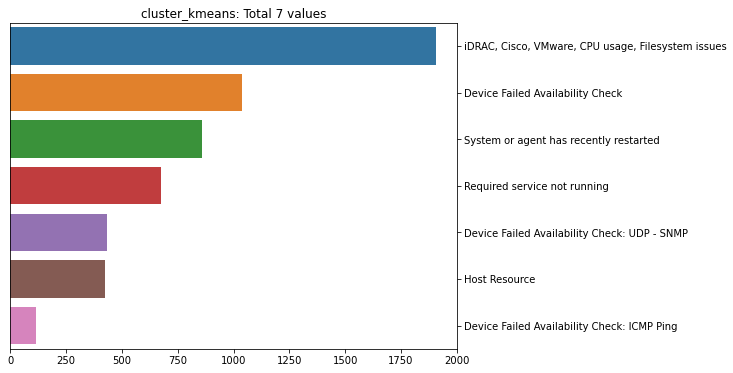

In [113]:
kmeans_dict = {0: 'Required service not running',
 1: 'Device Failed Availability Check',
 2: 'iDRAC, Cisco, VMware, CPU usage, Filesystem issues',
 3: 'System or agent has recently restarted',
 4: 'Device Failed Availability Check: UDP - SNMP',
 5: 'Device Failed Availability Check: ICMP Ping',
 6: 'Host Resource'}
print("Tickets distribution:")
draw_barplot(tickets['cluster_kmeans'].map(kmeans_dict))